1072275362
(136.9906335, 35.3344603)
(136.9906335, 35.3344603)


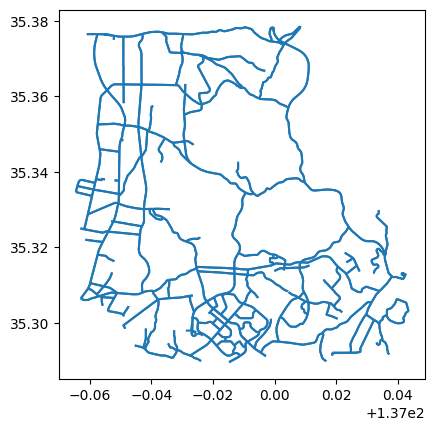

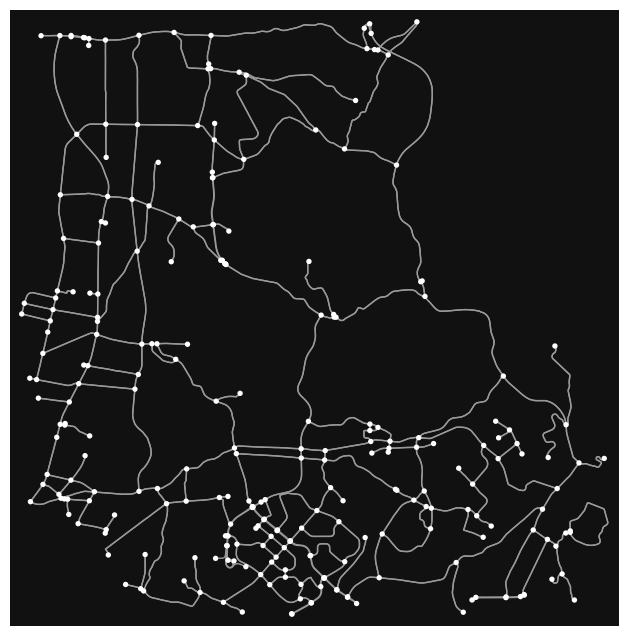

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [22]:
import osmnx as ox
import folium

# 峠道
graph = ox.graph_from_point(center_point=(35.334446, 136.990590)
                                , network_type='drive'
                                , dist=5000
                                , simplify=True
                                , custom_filter='["highway"~"tertiary|secondary|primary"]')

# グラフデータをGeoDataFrameに変換
gdf_nodes = ox.graph_to_gdfs(graph, nodes=True, edges=False)
gdf_edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

gdf_edges.plot()

# gdf_edges
# target_edges = gdf_edges[gdf_edges["highway"].isin(["primary", "tertiary", "secondary", "secondary_link"])]
# target_nodes = gdf_nodes[gdf_nodes["highway"].isin(["primary", "tertiary", "secondary", "secondary_link"])]

# for index, edge in gdf_edges.iterrows():
#   # ジオメトリ内のノードを抽出
#   nodes_in_geometry = list(edge.geometry.coords)
#   # # ループの処理
#   print("start:", edge.name[0])
#   print("end:", edge.name[1])
#   # for node in nodes_in_geometry:
#   #   print(node[0])
#   #   print(node[1])
  
      
# print(len(gdf_edges))
# print(len(gdf_nodes))

# G = ox.graph_from_gdfs(gdf_nodes, gdf_edges)
G = graph

def get_nearest_node_by_coordinates(graph, latitude, longitude):
    nearest_node = ox.distance.nearest_nodes(
        graph, longitude, latitude, return_dist=False
    )
    return nearest_node

hakatasta_node = get_nearest_node_by_coordinates(G, 35.334446, 136.990590)

def get_coordinates_by_node_id(graph, node_id):
    node_data = graph.nodes[node_id]
    x = node_data['x']
    y = node_data['y']
    return x, y

a = get_coordinates_by_node_id(G, hakatasta_node)
print(hakatasta_node)
print(a)
print(a)

ox.plot_graph(G)